## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  52.300073   503.293845  0.942801  10.363953  1.521718
1  98.649850   149.072969  0.617348   7.545166  0.944159
2  14.992772  1026.391957  0.230608   8.480366  1.562177
3  28.385888  1580.218144  0.131298   3.593168  1.429756
4  35.154333  1252.320367  0.726901   6.942761  1.560073


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0342633	total: 58ms	remaining: 57.9s
1:	learn: 1.0247967	total: 58.5ms	remaining: 29.2s
2:	learn: 1.0149457	total: 59.1ms	remaining: 19.6s
3:	learn: 1.0051122	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9952036	total: 60ms	remaining: 11.9s
5:	learn: 0.9869184	total: 60.5ms	remaining: 10s
6:	learn: 0.9765168	total: 60.9ms	remaining: 8.64s
7:	learn: 0.9662095	total: 61.5ms	remaining: 7.62s
8:	learn: 0.9540475	total: 61.9ms	remaining: 6.82s
9:	learn: 0.9442953	total: 62.3ms	remaining: 6.17s
10:	learn: 0.9355251	total: 62.8ms	remaining: 5.64s
11:	learn: 0.9251409	total: 63.1ms	remaining: 5.2s
12:	learn: 0.9163771	total: 63.6ms	remaining: 4.83s
13:	learn: 0.9068870	total: 64ms	remaining: 4.51s
14:	learn: 0.8971736	total: 64.4ms	remaining: 4.23s
15:	learn: 0.8892487	total: 65ms	remaining: 3.99s
16:	learn: 0.8792351	total: 65.4ms	remaining: 3.78s
17:	learn: 0.8709144	total: 65.9ms	remaining: 3.59s
18:	learn: 0.8628598	total: 66.3ms	remaining: 3.42s
19:

103:	learn: 0.4175458	total: 104ms	remaining: 892ms
104:	learn: 0.4150336	total: 104ms	remaining: 887ms
105:	learn: 0.4109458	total: 105ms	remaining: 883ms
106:	learn: 0.4072835	total: 105ms	remaining: 877ms
107:	learn: 0.4045196	total: 106ms	remaining: 872ms
108:	learn: 0.4020501	total: 106ms	remaining: 867ms
109:	learn: 0.3989973	total: 106ms	remaining: 861ms
110:	learn: 0.3963111	total: 107ms	remaining: 856ms
111:	learn: 0.3930009	total: 107ms	remaining: 851ms
112:	learn: 0.3904747	total: 108ms	remaining: 845ms
113:	learn: 0.3881157	total: 108ms	remaining: 839ms
114:	learn: 0.3849173	total: 108ms	remaining: 834ms
115:	learn: 0.3818633	total: 109ms	remaining: 829ms
116:	learn: 0.3793985	total: 109ms	remaining: 823ms
117:	learn: 0.3765378	total: 109ms	remaining: 818ms
118:	learn: 0.3741320	total: 110ms	remaining: 813ms
119:	learn: 0.3711597	total: 110ms	remaining: 807ms
120:	learn: 0.3689649	total: 110ms	remaining: 802ms
121:	learn: 0.3666156	total: 111ms	remaining: 798ms
122:	learn: 

293:	learn: 0.1480083	total: 185ms	remaining: 443ms
294:	learn: 0.1474601	total: 185ms	remaining: 443ms
295:	learn: 0.1468422	total: 186ms	remaining: 442ms
296:	learn: 0.1462455	total: 186ms	remaining: 441ms
297:	learn: 0.1457481	total: 187ms	remaining: 440ms
298:	learn: 0.1451470	total: 187ms	remaining: 439ms
299:	learn: 0.1446117	total: 187ms	remaining: 437ms
300:	learn: 0.1440009	total: 188ms	remaining: 436ms
301:	learn: 0.1433537	total: 188ms	remaining: 435ms
302:	learn: 0.1427600	total: 189ms	remaining: 434ms
303:	learn: 0.1420974	total: 189ms	remaining: 433ms
304:	learn: 0.1414667	total: 189ms	remaining: 432ms
305:	learn: 0.1409114	total: 190ms	remaining: 431ms
306:	learn: 0.1402583	total: 190ms	remaining: 429ms
307:	learn: 0.1393955	total: 191ms	remaining: 428ms
308:	learn: 0.1388473	total: 191ms	remaining: 428ms
309:	learn: 0.1383765	total: 192ms	remaining: 427ms
310:	learn: 0.1376762	total: 193ms	remaining: 426ms
311:	learn: 0.1371101	total: 193ms	remaining: 425ms
312:	learn: 

520:	learn: 0.0719632	total: 285ms	remaining: 262ms
521:	learn: 0.0718816	total: 285ms	remaining: 261ms
522:	learn: 0.0716544	total: 286ms	remaining: 261ms
523:	learn: 0.0714021	total: 286ms	remaining: 260ms
524:	learn: 0.0711798	total: 287ms	remaining: 259ms
525:	learn: 0.0708676	total: 287ms	remaining: 259ms
526:	learn: 0.0705451	total: 287ms	remaining: 258ms
527:	learn: 0.0703033	total: 288ms	remaining: 257ms
528:	learn: 0.0700970	total: 288ms	remaining: 257ms
529:	learn: 0.0697868	total: 289ms	remaining: 256ms
530:	learn: 0.0696791	total: 289ms	remaining: 255ms
531:	learn: 0.0694462	total: 289ms	remaining: 255ms
532:	learn: 0.0691908	total: 290ms	remaining: 254ms
533:	learn: 0.0689063	total: 290ms	remaining: 253ms
534:	learn: 0.0686272	total: 291ms	remaining: 253ms
535:	learn: 0.0682835	total: 292ms	remaining: 252ms
536:	learn: 0.0680108	total: 292ms	remaining: 252ms
537:	learn: 0.0679495	total: 292ms	remaining: 251ms
538:	learn: 0.0678280	total: 293ms	remaining: 250ms
539:	learn: 

702:	learn: 0.0451534	total: 366ms	remaining: 155ms
703:	learn: 0.0450604	total: 367ms	remaining: 154ms
704:	learn: 0.0450034	total: 367ms	remaining: 154ms
705:	learn: 0.0449122	total: 368ms	remaining: 153ms
706:	learn: 0.0448560	total: 368ms	remaining: 153ms
707:	learn: 0.0447666	total: 369ms	remaining: 152ms
708:	learn: 0.0447111	total: 369ms	remaining: 151ms
709:	learn: 0.0446564	total: 369ms	remaining: 151ms
710:	learn: 0.0446359	total: 370ms	remaining: 150ms
711:	learn: 0.0444753	total: 370ms	remaining: 150ms
712:	learn: 0.0443177	total: 371ms	remaining: 149ms
713:	learn: 0.0441318	total: 371ms	remaining: 149ms
714:	learn: 0.0440277	total: 371ms	remaining: 148ms
715:	learn: 0.0439739	total: 372ms	remaining: 147ms
716:	learn: 0.0439208	total: 372ms	remaining: 147ms
717:	learn: 0.0437679	total: 372ms	remaining: 146ms
718:	learn: 0.0435975	total: 373ms	remaining: 146ms
719:	learn: 0.0434986	total: 373ms	remaining: 145ms
720:	learn: 0.0433173	total: 374ms	remaining: 145ms
721:	learn: 

924:	learn: 0.0268315	total: 465ms	remaining: 37.7ms
925:	learn: 0.0267510	total: 466ms	remaining: 37.2ms
926:	learn: 0.0266882	total: 467ms	remaining: 36.7ms
927:	learn: 0.0266206	total: 467ms	remaining: 36.2ms
928:	learn: 0.0265794	total: 467ms	remaining: 35.7ms
929:	learn: 0.0265391	total: 468ms	remaining: 35.2ms
930:	learn: 0.0264601	total: 468ms	remaining: 34.7ms
931:	learn: 0.0263685	total: 469ms	remaining: 34.2ms
932:	learn: 0.0262452	total: 469ms	remaining: 33.7ms
933:	learn: 0.0262015	total: 470ms	remaining: 33.2ms
934:	learn: 0.0261627	total: 470ms	remaining: 32.7ms
935:	learn: 0.0260730	total: 470ms	remaining: 32.2ms
936:	learn: 0.0260137	total: 471ms	remaining: 31.6ms
937:	learn: 0.0259372	total: 471ms	remaining: 31.1ms
938:	learn: 0.0258497	total: 472ms	remaining: 30.6ms
939:	learn: 0.0257747	total: 472ms	remaining: 30.1ms
940:	learn: 0.0256888	total: 473ms	remaining: 29.6ms
941:	learn: 0.0255716	total: 473ms	remaining: 29.1ms
942:	learn: 0.0255155	total: 473ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

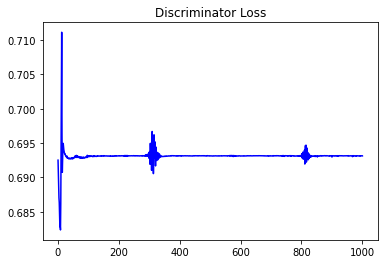

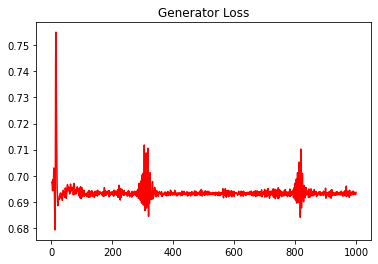

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16269115940100853


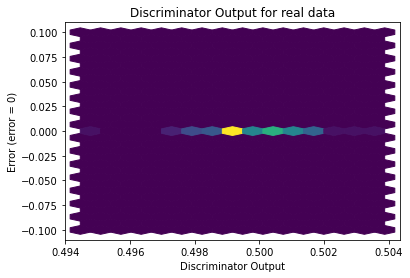

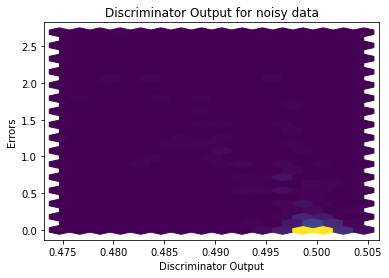

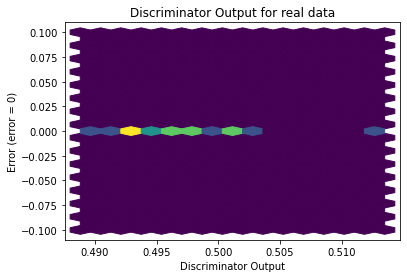

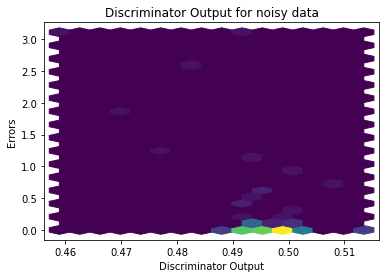

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


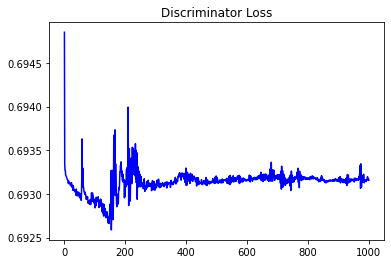

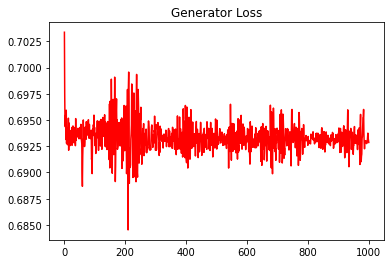

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16464229827071417


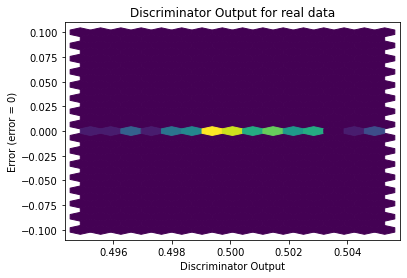

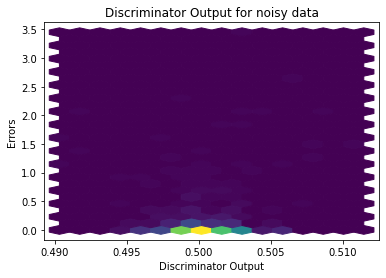

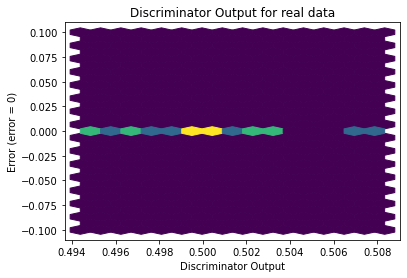

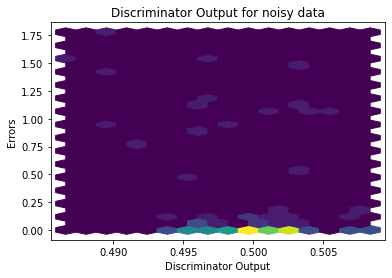

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0450]], requires_grad=True)
